<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_inceptionv3_BRCA_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset download
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── cats<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── dogs<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── cats<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── dogs<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/gdrive/MyDrive/KAIST/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!mkdir datasets
!unzip /content/cat-and-dog.zip -d /content/datasets
!mv /content/datasets/test_set /content/datasets/test_set_legacy
!mv /content/datasets/test_set_legacy/test_set /content/datasets/test_set
!mv /content/datasets/training_set /content/datasets/training_set_legacy
!mv /content/datasets/training_set_legacy/training_set /content/datasets/training_set
!rm -rf /content/datasets/*_set_legacy

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/datasets/training_s

# Data Load

In [ ]:
!ls -l /content/gdrive/MyDrive/KAIST/dataset/test_set

total 8
drwx------ 2 root root 4096 May 30 05:32 lym
drwx------ 2 root root 4096 May 30 05:32 normal


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
rootPath = '/content/gdrive/MyDrive/KAIST/SEP592/jpeg_label_dir'

IMAGE_SIZE = 299

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='validation'
)

Found 22872 images belonging to 3 classes.
Found 2540 images belonging to 3 classes.


# 모델 구성 및 finetuning

In [5]:
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 3

In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________

In [7]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [8]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

x = baseModel.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
x = BatchNormalization()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(
    inputs=baseModel.input
    , outputs=x
    )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 38,715,683
Trainable params: 38,679,715
Non-trainable params: 35,968
__________________________________________________________________________________________________


In [9]:
NUM_FREEZE = 250

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

In [12]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 646s 34s/step - loss: 0.8625 - acc: 0.5078 - val_loss: 0.8814 - val_acc: 0.5953
Epoch 2/10
20/20 [==============================] - 663s 35s/step - loss: 0.6976 - acc: 0.6062 - val_loss: 0.6525 - val_acc: 0.6141
Epoch 3/10
20/20 [==============================] - 661s 35s/step - loss: 0.5985 - acc: 0.6687 - val_loss: 0.5118 - val_acc: 0.7703
Epoch 4/10
20/20 [==============================] - 575s 30s/step - loss: 0.4260 - acc: 0.8156 - val_loss: 0.5956 - val_acc: 0.7210
Epoch 5/10
20/20 [==============================] - 322s 17s/step - loss: 0.3252 - acc: 0.8578 - val_loss: 0.5303 - val_acc: 0.8062
Epoch 6/10
20/20 [==============================] - 325s 17s/step - loss: 0.3911 - acc: 0.8531 - val_loss: 0.4094 - val_acc: 0.8156
Epoch 7/10
20/20 [==============================] - 323s 17s/step - loss: 0.2985 - acc: 0.8984 - val_loss: 0.4784 - val_acc: 0.7734
Epoch 8/10
20/20 [==============================] - 321s 17s/step - loss: 0.

#학습 결과 시각화

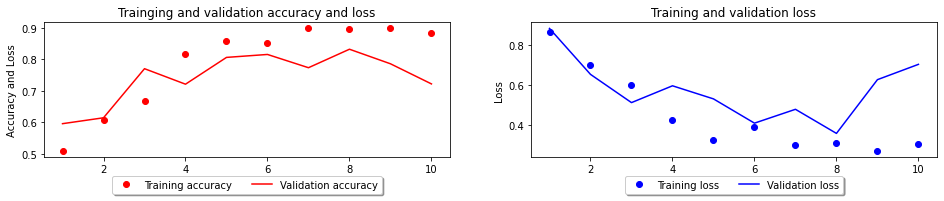

In [13]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


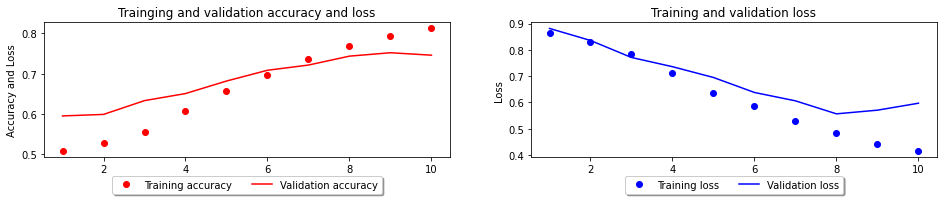

In [14]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 중간평가

In [15]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
)

#model.evaluate_generator(testGen)
model.evaluate(testGen)

FileNotFoundError: ignored

#모델 추가 학습

In [16]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=0, min_delta=-0.02)

epochs = 20
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
#    callbacks=[early_stopping],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 6/20 [========>.....................] - ETA: 3:39 - loss: 0.2485 - acc: 0.8958

KeyboardInterrupt: ignored

#추가 학습 결과 시각화

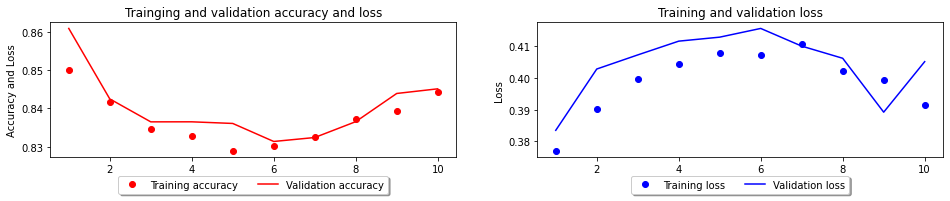

In [ ]:
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)